# Doge INR Analysis

In [1]:

import numpy as np 
import pandas as pd 
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:
missing_values = ["na","n/a","-","NaN"]  #dataset may contains null values in these forms
dogecoin_dataset = pd.read_csv("../Dataset/DOGE-INR.csv",na_values=missing_values)

Lets see the dataset

In [3]:
dogecoin_dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-11,0.074644,0.081936,0.074328,0.078261,0.078261,145377173
1,2017-11-12,0.077447,0.078832,0.065263,0.067637,0.067637,214308634
2,2017-11-13,0.068183,0.079276,0.066426,0.079244,0.079244,162349496
3,2017-11-14,0.078565,0.081071,0.074006,0.077453,0.077453,173986236
4,2017-11-15,0.077770,0.088193,0.077083,0.087366,0.087366,185350147


Quick insights

In [4]:
dogecoin_dataset.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1659.000000,1659.000000,1659.000000,1659.000000,1659.000000,1.659000e+03
mean,4.384468,4.649606,4.125136,4.388867,4.388867,7.742472e+10
std,7.728734,8.321258,7.151628,7.732810,7.732810,2.716160e+11
min,0.068183,0.078832,0.065263,0.067637,0.067637,9.307612e+07
25%,0.181945,0.187139,0.177005,0.182408,0.182408,1.478261e+09
50%,0.236395,0.243476,0.226631,0.236394,0.236394,5.649922e+09
75%,5.095558,5.798277,4.752553,5.205938,5.205938,5.062650e+10
max,50.409313,54.056625,44.576260,50.187649,50.187649,5.175496e+12


In [5]:
dogecoin_open_data = dogecoin_dataset['Open']
dogecoin_high_data = dogecoin_dataset['High']
dogecoin_low_data = dogecoin_dataset['Low']
dogecoin_close_data = dogecoin_dataset['Close']
dogecoin_date = dogecoin_dataset['Date']
dogecoin_dataset['Volume'] /= pow(10,10)
dogecoin_volume_data = dogecoin_dataset['Volume']  #scale volume



In [6]:
#first date of dataset
start_date = datetime.datetime.strptime(dogecoin_date[0],"%Y-%m-%d") 
#last date of dataset
end_date = datetime.datetime.strptime(dogecoin_date[len(dogecoin_date)-1],"%Y-%m-%d")
date_range = pd.date_range(start_date,end_date)


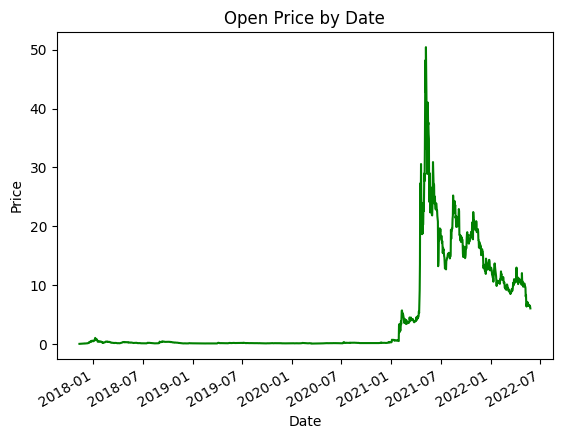

In [7]:
fig, ax = plt.subplots()
ax.plot(date_range,dogecoin_open_data,"green")
ax.xaxis_date() 
fig.autofmt_xdate()
plt.title("Open Price by Date")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

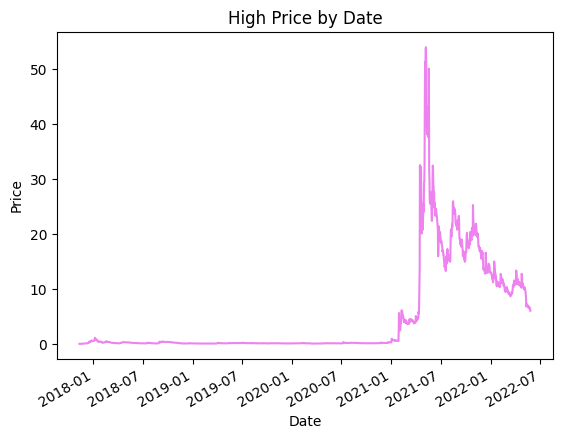

In [8]:
fig, ax = plt.subplots()
ax.plot(date_range,dogecoin_high_data,"violet")
ax.xaxis_date() 
fig.autofmt_xdate()
plt.title("High Price by Date")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

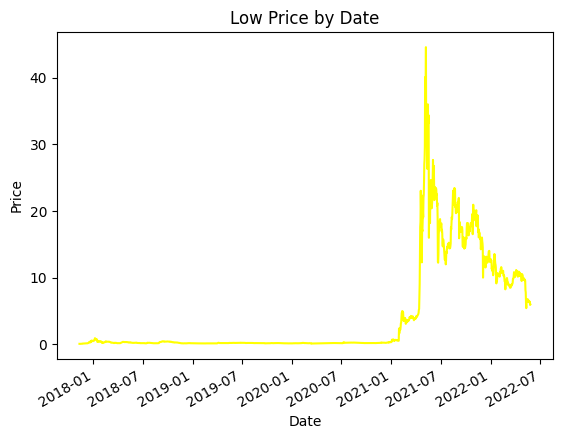

In [9]:
fig, ax = plt.subplots()
ax.plot(date_range,dogecoin_low_data,"yellow")
ax.xaxis_date() 
fig.autofmt_xdate()
plt.title("Low Price by Date")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

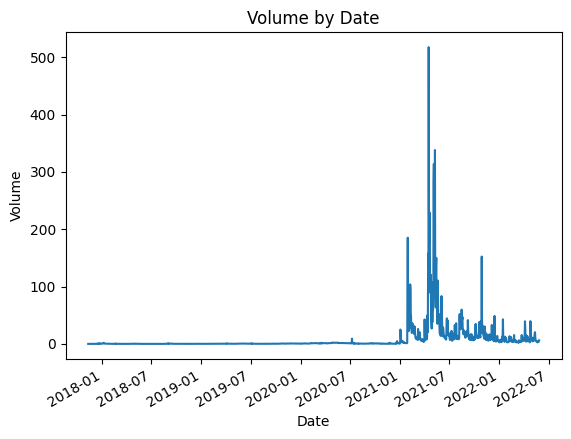

In [10]:
fig, ax = plt.subplots()
ax.plot(date_range,dogecoin_volume_data)
ax.xaxis_date() 
fig.autofmt_xdate()
plt.title("Volume by Date")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [11]:
difference_in_high_and_low = dogecoin_high_data - dogecoin_low_data
difference_in_high_and_low.head()

0    0.007608
1    0.013569
2    0.012850
3    0.007065
4    0.011110
dtype: float64

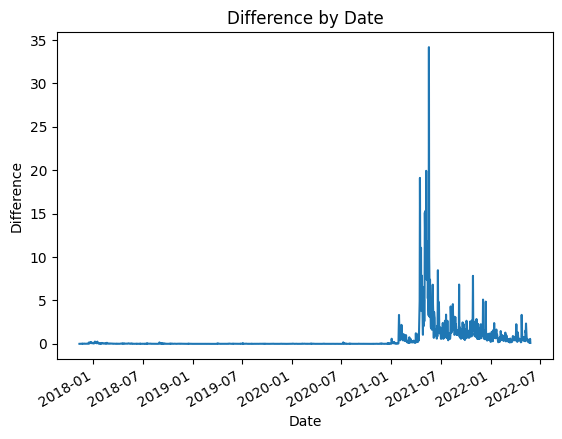

In [12]:
fig, ax = plt.subplots()
ax.plot(date_range,difference_in_high_and_low)
ax.xaxis_date() 
fig.autofmt_xdate()
plt.title("Difference by Date")
plt.xlabel("Date")
plt.ylabel("Difference")
plt.show()

As the difference between High and Low price increases suddenly in mid 2021, it clearly show its volatile nature.

In [13]:
difference_in_close_and_open = dogecoin_close_data - dogecoin_open_data
difference_in_close_and_open

0       0.003617
1      -0.009810
2       0.011061
3      -0.001112
4       0.009596
          ...   
1654   -0.244546
1655    0.024726
1656   -0.048351
1657   -0.357064
1658   -0.086938
Length: 1659, dtype: float64

/tmp/ipykernel_10825/4284908036.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


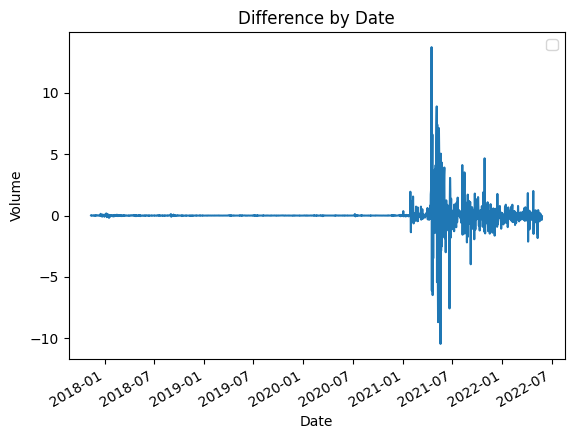

In [14]:
fig, ax = plt.subplots()
ax.plot(date_range,difference_in_close_and_open)
ax.xaxis_date() 
fig.autofmt_xdate()
plt.title("Difference by Date")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

**Very Volatile!!**

# Missing Values

In [15]:
dogecoin_dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

only one row is missing!

# Fill Missing Values

In [16]:
dogecoin_dataset['Open'] = dogecoin_dataset['Open'].fillna(dogecoin_open_data.mean())
dogecoin_dataset['High'] = dogecoin_dataset['High'].fillna(dogecoin_high_data.mean())
dogecoin_dataset['Low'] = dogecoin_dataset['Low'].fillna(dogecoin_low_data.mean())
dogecoin_dataset['Close'] = dogecoin_dataset['Close'].fillna(dogecoin_close_data.mean())
dogecoin_dataset['Adj Close'] = dogecoin_dataset['Adj Close'].fillna(dogecoin_dataset['Adj Close'].mean())
dogecoin_dataset['Volume'] = dogecoin_dataset['Volume'].fillna(dogecoin_volume_data.mean())
dogecoin_dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

*All null values filled*

In [18]:
# Select only the numeric columns
numeric_columns = dogecoin_dataset.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)


               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.993947  0.993814  0.992651   0.992651  0.554282
High       0.993947  1.000000  0.986674  0.995197   0.995197  0.618754
Low        0.993814  0.986674  1.000000  0.994654   0.994654  0.519709
Close      0.992651  0.995197  0.994654  1.000000   1.000000  0.588174
Adj Close  0.992651  0.995197  0.994654  1.000000   1.000000  0.588174
Volume     0.554282  0.618754  0.519709  0.588174   0.588174  1.000000


In [19]:
dogecoin_dataset = dogecoin_dataset.drop(columns=['Date','Adj Close','Volume'])

X_train, X_test, y_train, y_test = train_test_split(dogecoin_dataset,dogecoin_volume_data)

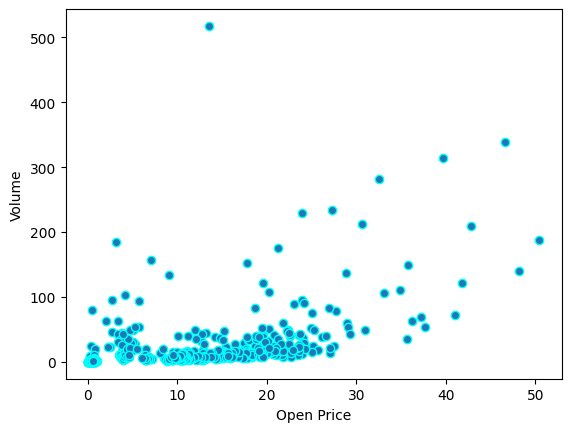

In [20]:
plt.scatter(dogecoin_open_data,dogecoin_volume_data,edgecolors="cyan")
plt.xlabel('Open Price')
plt.ylabel('Volume')
plt.show()

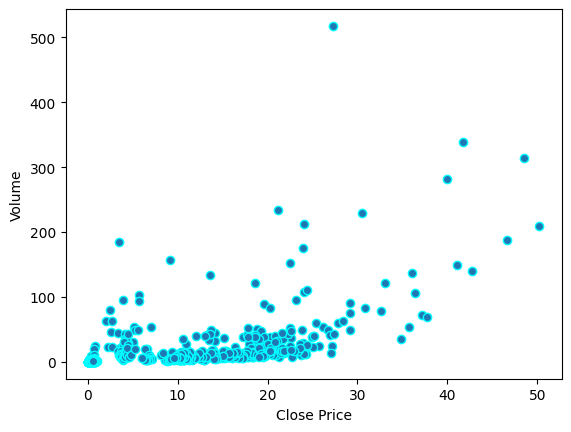

In [21]:
plt.scatter(dogecoin_close_data,dogecoin_volume_data,edgecolors="cyan")
plt.xlabel('Close Price')
plt.ylabel('Volume')
plt.show()

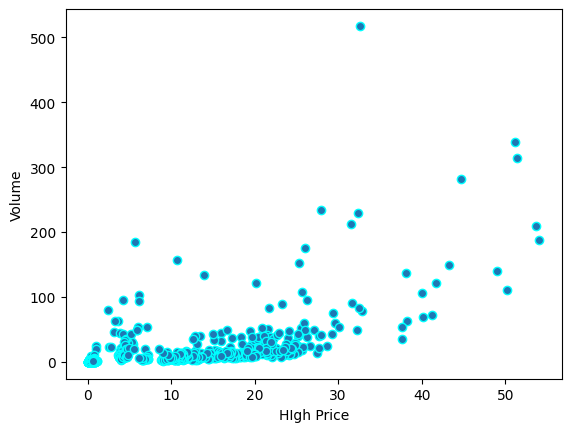

In [22]:
plt.scatter(dogecoin_high_data,dogecoin_volume_data,edgecolors="cyan")
plt.xlabel('HIgh Price')
plt.ylabel('Volume')
plt.show()

In [23]:
# train the model using the training sets
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [24]:
#regression coefficients
print('Coefficients: ', reg.coef_)
 
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [ -6.62000746  22.25376623 -15.70401979  -0.62163847]
Variance score: -0.19677428411587194


**variance score: 1 means perfect prediction*

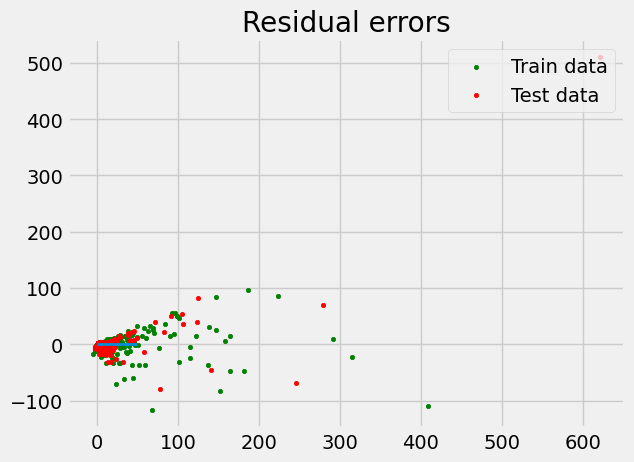

In [25]:
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight' )
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "red", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [26]:

lin = LinearRegression()
    
    
lin.fit(X_train, y_train)
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
lin2 = LinearRegression()
lin2.fit(X_poly, y_train)
Y_poly = lin2.predict(X_poly)


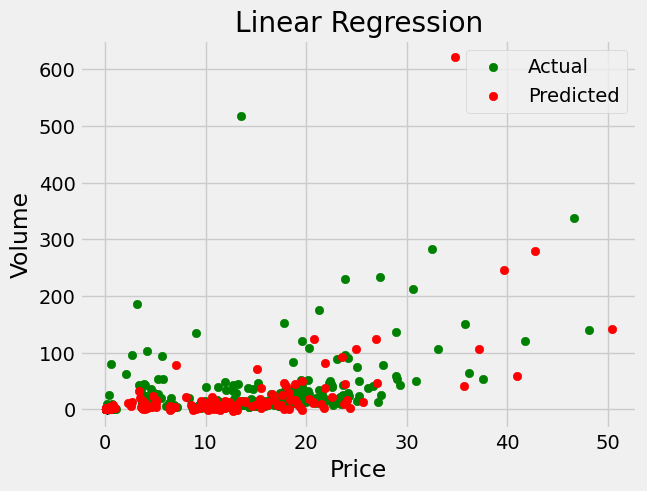

In [27]:
# Visualising the Linear Regression results
plt.scatter(X_train['Open'], y_train, color = 'green',label='Actual')
 
plt.scatter(X_test['Open'], lin.predict(X_test), color = 'red',label='Predicted')
plt.title('Linear Regression')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.legend()
plt.show()

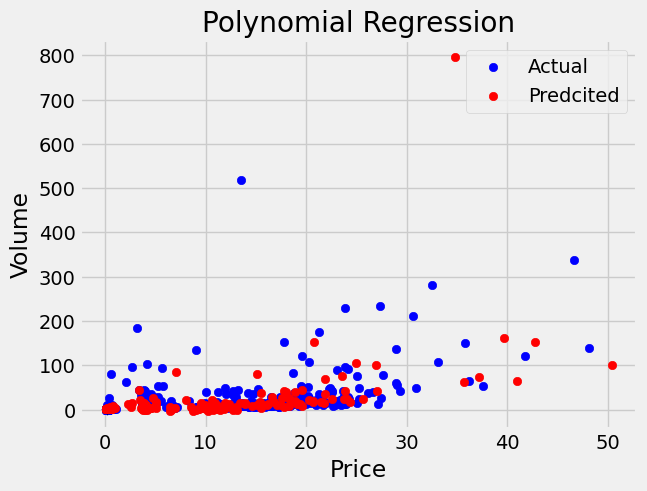

0.9432150416451026


In [28]:
plt.scatter(X_train['Open'],y_train,color='blue',label='Actual')
plt.scatter(X_test['Open'],lin2.predict(poly.fit_transform(X_test)),color='red',label='Predcited')
plt.title('Polynomial Regression')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.legend()
plt.show()

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, mymodel(x)))


In [29]:
from sklearn.linear_model import Lasso
Ls=Lasso()
Ls.fit(X_train,y_train)
ypred=Ls.predict(X_test)

Ls.score(X_test,y_test)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.602e+04, tolerance: 9.670e+01
  model = cd_fast.enet_coordinate_descent(


-0.06898752036239397

In [30]:
from sklearn.tree import DecisionTreeRegressor
mytre=DecisionTreeRegressor(max_depth=3)
mytre.fit(X_train,y_train)
ypredd=mytre.predict(X_test)
mytre.score(X_test,y_test)

0.6019608565462067

## Conclusion

## ACCURACIES

Linear Regression Score =  0.7252501795238595
Polynomial regression = 0.9432150416451027
Ridge Regression Score = 0.7582715677949581
DecisionTree Regressor Score = 0.45641472722854337
CONCLUSION
Hence from above score,
We can conclude that Polynomial Regression gives the most accurate results with approx. (94.4 %) accuratecy rate.